# 4th Session: Parallel Processes with Semaphores and Memory Locks

In this session we will implements a parallel proceses with sempahores and memory locks

In [1]:
%matplotlib inline
import multiprocessing as mp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from multiprocessing import Semaphore, Lock, Process, Pool
from multiprocessing.sharedctypes import Value, Array, RawArray
import scipy.io
import ctypes
import myfunctions4 as my
import time

In the next cells, we import the importlib module, needed to reload tue updated myfunctions2 module
evry time we change the functions

In [2]:
import importlib

In [3]:
importlib.reload(my)

<module 'myfunctions4' from '/home/yamroza/Documents/SEMV/MassiveComputing/Session_7/Session7_2022/myfunctions4.py'>

This first parallel Multiple Instructions, Multiple Data parallel program will try to make deposits and withdraws over a shared memory value, called balance. 
It will starts with  value of 100.

The use of Pool execution is oriented to Single Instruction, Multiple Data parallel processes: We define just one execution function, which will be applied to multiple data.

Now, if we will execute a Multiple Instruction, Multiple Data program, we need to use the *multiprocessing.Process* class.

In this case, we constructs as many of multiprocessing.Process objects we need, assigning which function will executed in each one of the parallel process, and passing their arguments values

After define the Process objects, we start those process with the method start() and each one of them will starts to run.

To sinchronyze the execution, we can wait until one parallel process ends using the method join()



In [5]:
# Python program to illustrate  
# the concept of race condition 
# in multiprocessing 
 
  
# function to withdraw from account 

  
def perform_transactions(): 
  
    # initial balance (in shared memory) 
    balance = mp.Value('i', 100) 
  
    # creating new processes 
    p1 = mp.Process(target=my.withdraw, args=(balance,)) 
    p2 = mp.Process(target=my.deposit, args=(balance,)) 
  
    # starting processes 
    p1.start() 
    p2.start() 
  
    # wait until processes are finished 
    p1.join() 
    p2.join() 
  
    # print final balance 
    print("Final balance = {}".format(balance.value)) 

We will run 10 times the main function "perform_transactions".
Check 2 things: final value and time used

In [6]:
start_time = time.time()
for _ in range(10): 
    # perform same transaction process 10 times 
    perform_transactions()
print("--- %s seconds ---" % (time.time() - start_time))


Final balance = -85
Final balance = 245
Final balance = 86
Final balance = -86
Final balance = 496
Final balance = 190
Final balance = 332
Final balance = 328
Final balance = -77
Final balance = -17
--- 0.5076367855072021 seconds ---


Here we have a race condition, making several hazzards. In this case, we says: we have a race condition

We do not controls the state of the shared variable *balance*
Check the execution time

### Avoid Race conditions
In order to avoid race conditions, we have to use locks.

We can use the inner lock properties in the Value object o use a global lock object

Now, we create, more or less the same code, using locks:

In [7]:
def perform_transactions2(): 
  
    # initial balance (in shared memory) 
    balance = mp.Value('i', 100) 
  
    # creating a lock object 
    lock = mp.Lock() 
  
    # creating new processes 
    p1 = mp.Process(target=my.withdraw2, args=(balance,lock)) 
    p2 = mp.Process(target=my.deposit2, args=(balance,lock)) 
  
    # starting processes 
    p1.start() 
    p2.start() 
  
    # wait until processes are finished 
    p1.join() 
    p2.join() 
  
    # print final balance 
    print("Final balance = {}".format(balance.value)) 

Check, again, the final balance value and the execution time.

In [8]:
start_time=time.time()
for _ in range(10): 
    # perform same transaction process 10 times 
    perform_transactions2() 
print("--- %s seconds ---" % (time.time() - start_time))

Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
Final balance = 100
--- 0.6602380275726318 seconds ---


## Practical Work:

We need to decode two signals which contain an Stereo transmited signal.

The analogic stereo signal is transmited using 2 channels:

* The first channel (main channel) transmit the signal: $M(t) = \frac{L(t)+R(t)}{2}$
* The second channel (secondary) transmit the signal: $S(t) = \frac{L(t)-R(t)}{2}$

You have 2 files (sound1.mat and sound2.mat), which contain the master channel and secondary channel of an stereo transmision.

In [16]:
sound1 = scipy.io.loadmat('sound1.mat')
sound2 = scipy.io.loadmat('sound2.mat')

In [17]:
sound1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Sep 26 12:26:45 2022',
 '__version__': '1.0',
 '__globals__': [],
 'sound1': array([[0.20946735, 0.41618402, 0.61744161, ..., 0.55942127, 0.40841357,
         0.246289  ]])}

In [11]:
s1 = sound1["sound1"]
s2 = sound2["sound2"]

In [12]:
s1.shape

(1, 1000000)

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

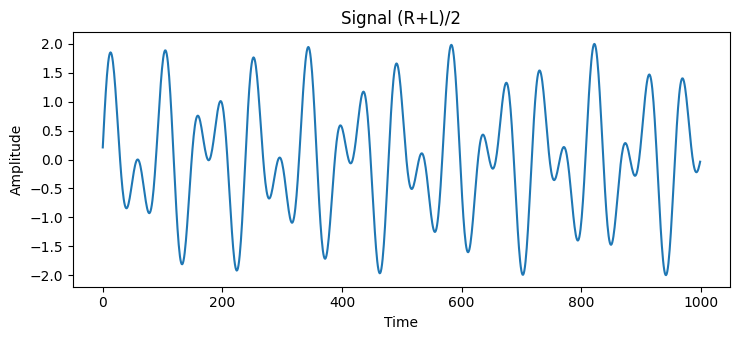

In [14]:
fig, axs = plt.subplots()
axs.set_title("Signal (R+L)/2")
axs.plot(range(1000), s1[0,0:1000], color='C0')
axs.set_xlabel("Time")
axs.set_ylabel("Amplitude")

plt.show()

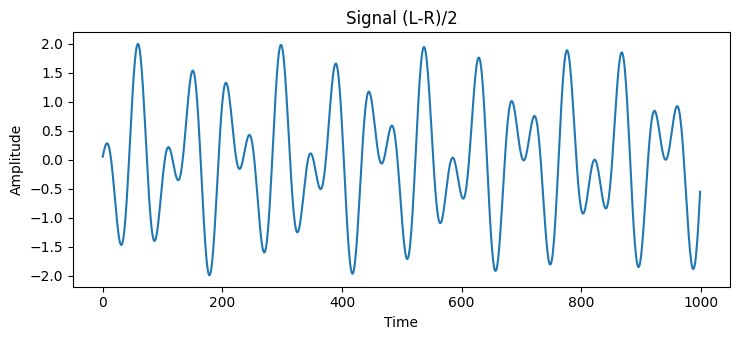

In [15]:
fig, axs = plt.subplots()
axs.set_title("Signal (L-R)/2")
axs.plot(range(1000), s2[0,0:1000], color='C0')
axs.set_xlabel("Time")
axs.set_ylabel("Amplitude")

plt.show()

Your task now is, in the parallel process function:
* Create 2 shared memory Arrays where store the recovered signals. Take care about the data type and length of the memory array.
* Implements the funcions decode_L and decode_R, where you have to store the recovered signals R and L from the encoded signals S1 and S2. Try the use the maximum number of processors per parallel process. (That means if you have 4 processors, assign 23 tho the p1 and 2 to the p2).
* Sinchronize the execution of both process, waiting for the ends.
* Once both process end, plot the resulting signals.

In [ ]:
shared_data1=<FILL_IN>

In [ ]:
shared_data2=<FILL_IN>

In [ ]:
def parallel_process(sound1,sound2,shared_space_1, shared_space_2):
    #takes the number of processors and divide by 2, for fair play
    numprocess = int(mp.cpu_count()/2)
    #creates a lock instance
    lock = mp.Lock()
    #defines both processes
    p1 = mp.Process(target = my.decode_L, args = (sound1,sound2,shared_space_1,numprocess,lock)) 
    p2 = mp.Process(target = my.decode_R, args = (sound1,sound2,shared_space_2,numprocess,lock))
    #fires both processes in parallel
    p1.start()
    p2.start()
    
    #Now, whe have to wait until both parallel tasks
    #<fill code here> to wait both processes end before continues
    #Ploting the finalsignals.
    #Just plots the first 1000 samples of both images
    
    #<fill code here tho fire the third process and wait until it ends>
    

In [ ]:
parallel_process(sound1, sound2, shared_data1, shared_data2)